In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import dendrotweaks as dd

/home/roman/Documents/code/DendroTweaks/app/src


In [3]:
swcm = dd.file_managers.SWCManager()
swcm.path_to_data = 'data/'

In [4]:
# file_name = 'ball-and-stick.swc'
file_name = 'final_figure_extra-000.swc'
swcm.read(file_name)

# Raw data

Once we have read the file we can view its content as a Pandas DataFrame using `df` attribute. We can use functionality of pandas to perform EDA and tidy up the data if needed. Typically we should check:
- what types are present and if they are correct (see types here), if the tree is sorted by type.
- the statistics for the coordinates and the 'spread' of the data, to get some idea of how the neuron is oriented in space. For a pyramidal neuron the apical dendrite typically aligned with the Y axis.
- Soma notation
- 

In [5]:
swcm.df.head()

,id,type,x,y,z,r,parent_id
0,2,1,79.950000,80.340000,267.0,0.0,-1
1,3,3,79.950000,80.340000,267.0,0.0,2
2,4,3,78.986339,76.604842,267.0,0.0,3
3,5,3,79.383256,74.620260,273.0,0.0,4
4,6,3,78.589423,72.635679,276.0,0.0,5


In [6]:
# Count the number of each type of node
swcm.df.type.value_counts()

3    1093
4     485
2      31
1       1
Name: type, dtype: int64

In [7]:
swcm.df['r'].unique()

array([0.])

In [8]:
# Show the summary statistics of the coordinates
swcm.df[['x', 'y', 'z']].describe()

,x,y,z
count,1610.000000,1610.000000,1610.000000
mean,106.264735,89.779864,249.080124
std,45.204176,36.229093,92.237745
min,1.190749,0.396916,0.000000
25%,73.429511,64.300437,192.000000
50%,105.182814,87.718497,285.000000
75%,139.218385,114.311888,309.000000
max,202.427302,177.421576,375.000000


In [9]:
# switch y and z columns
if file_name == 'final_figure_extra-000.swc':
    swcm.df[['y', 'z']] = swcm.df[['z', 'y']]
    swcm.df.loc[swcm.df.type == 2, 'type'] = 4
    swcm.df.sort_values('type', inplace=True)

In [10]:
# Show min and max idx for each node type
swcm.df.groupby('type').agg({'id': ['min', 'max']})

id      
      min   max
type           
1       2     2
3       3  1611
4     811  1326

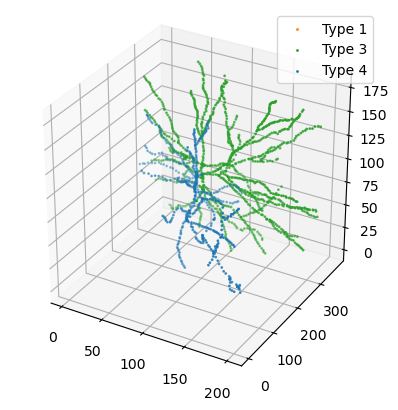

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect='equal')

swcm.plot_raw_data(ax)

# SWC Tree

## Connect

We will now use the dataframe to create the tree representation of the cell.

In [12]:
swcm.build_swc_tree()

Building SWC tree...
Connecting tree.


In [13]:
swcm.swc_tree

Tree [•2, •722, •723, •724, •725, •726, •727, •728, •729, •730, •731, •732, •733, •734, •735, •721, •736, •738, •739, •740, •741, •742, •743, •744, •745, •746, •747, •748, •749, •750, •751, •737, •752, •720, •718, •688, •689, •690, •691, •692, •693, •694, •695, •696, •697, •698, •699, •700, •701, •719, •702, •704, •705, •706, •707, •708, •709, •710, •711, •712, •713, •714, •715, •716, •717, •703, •687, •753, •755, •790, •791, •792, •793, •794, •795, •796, •797, •798, •799, •800, •801, •802, •803, •789, •804, •1610, •807, •808, •809, •810, •1327, •1328, •1329, •1330, •1331, •1332, •1333, •1334, •1335, •805, •754, •788, •786, •756, •757, •758, •759, •760, •761, •762, •763, •764, •765, •766, •767, •768, •769, •787, •770, •772, •773, •774, •775, •776, •777, •778, •779, •780, •781, •782, •783, •784, •785, •771, •686, •685, •684, •585, •586, •587, •588, •589, •590, •591, •592, •593, •594, •595, •596, •597, •598, •584, •599, •601, •602, •603, •604, •605, •606, •607, •608, •609, •610, •611, •6

In [14]:
swcm.swc_tree.is_connected

True

## Sort

We now want to make sure that the nodes are properly sorted. For this we will perform depth-first traversal of the tree and update a node's index as we visit the node.

In [15]:
swcm.swc_tree.sort()

  Elapsed time: 0.0 seconds


In [16]:
swcm.swc_tree.is_sorted

True

In [17]:
swcm.swc_tree

Tree [•0, •1, •2, •3, •4, •5, •6, •7, •8, •9, •10, •11, •12, •13, •14, •15, •16, •17, •18, •19, •20, •21, •22, •23, •24, •25, •26, •27, •28, •29, •30, •31, •32, •33, •34, •35, •36, •37, •38, •39, •40, •41, •42, •43, •44, •45, •46, •47, •48, •49, •50, •51, •52, •53, •54, •55, •56, •57, •58, •59, •60, •61, •62, •63, •64, •65, •66, •67, •68, •69, •70, •71, •72, •73, •74, •75, •76, •77, •78, •79, •80, •81, •82, •83, •84, •85, •86, •87, •88, •89, •90, •91, •92, •93, •94, •95, •96, •97, •98, •99, •100, •101, •102, •103, •104, •105, •106, •107, •108, •109, •110, •111, •112, •113, •114, •115, •116, •117, •118, •119, •120, •121, •122, •123, •124, •125, •126, •127, •128, •129, •130, •131, •132, •133, •134, •135, •136, •137, •138, •139, •140, •141, •142, •143, •144, •145, •146, •147, •148, •149, •150, •151, •152, •153, •154, •155, •156, •157, •158, •159, •160, •161, •162, •163, •164, •165, •166, •167, •168, •169, •170, •171, •172, •173, •174, •175, •176, •177, •178, •179, •180, •181, •182, •183, 

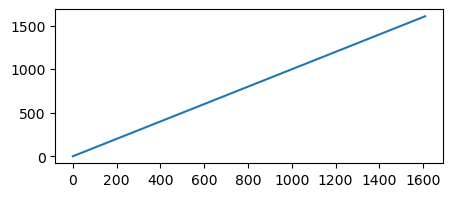

In [18]:
plt.figure(figsize=(5, 2))
plt.plot([node.idx for node in swcm.swc_tree._nodes])

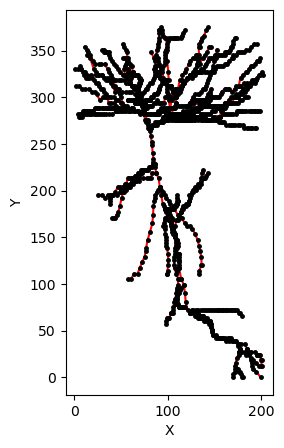

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
swcm.swc_tree.plot_points(ax, edges=True, annotate=True, projection='XY')

## Shift and rotate

In [20]:
swcm.swc_tree.soma_center

array([ 79.95, 267.  ,  80.34])

In [21]:
swcm.swc_tree.apical_center

array([115.04912763, 130.45348837,  97.56787524])

In [22]:
swcm.swc_tree.shift_coordinates_to_soma_center()

In [23]:
swcm.swc_tree.align_apical_dendrite(axis='Y', facing='up')

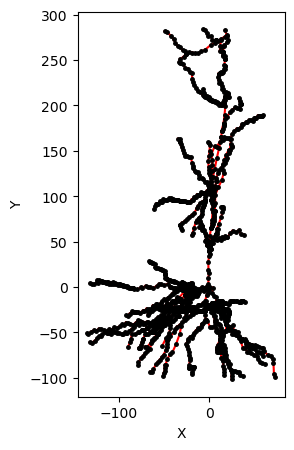

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
swcm.swc_tree.plot_points(ax, edges=True, annotate=True, projection='XY')

In [ ]:
swcm.swc_tree.rotate(-30, axis='Y')

## Split to sections

In [20]:
swcm.swc_tree.split_to_sections()

  Elapsed time: 0.0 seconds


## Extend

Let's now visualize an arbitrary section (blue) and its parent section (orange). As you might notice the section appears detached from its parent. This is typical for SWC files, however, for our model we will need to recover this missing point. We can do it with extend section method.

WARNING: Note that we are using the hidden `swc_tree._sections` attribute only to explain the underlying algorithm. You shouln't use it at this stage because the sections have not been assigned `children` attribute. To work with sections we will further build a properly connected `SectionTree` instance.

array([[<Axes: title={'center': 'XZ'}>, <Axes: title={'center': 'YZ'}>],
       [<Axes: title={'center': 'XY'}>, <Axes: >]], dtype=object)

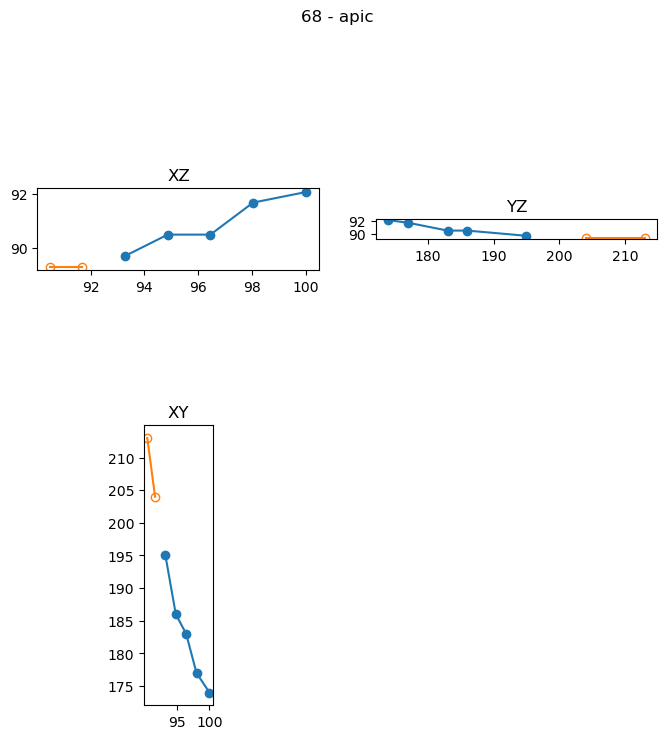

In [22]:
fix, ax = plt.subplots(2, 2, figsize=(8, 8))
swcm.swc_tree._sections[71].plot_pts3d(ax=ax, plot_radii=False)

In [23]:
swcm.swc_tree.extend_sections()

As you can see now, we have added a point in the beginning of our section that has the same coordinates as the point from the end of its parent section. And we did this for all points besides the soma children as we assume the soma has some spherical shape and the soma children do not start immediately from the soma center.

array([[<Axes: title={'center': 'XZ'}>, <Axes: title={'center': 'YZ'}>],
       [<Axes: title={'center': 'XY'}>, <Axes: >]], dtype=object)

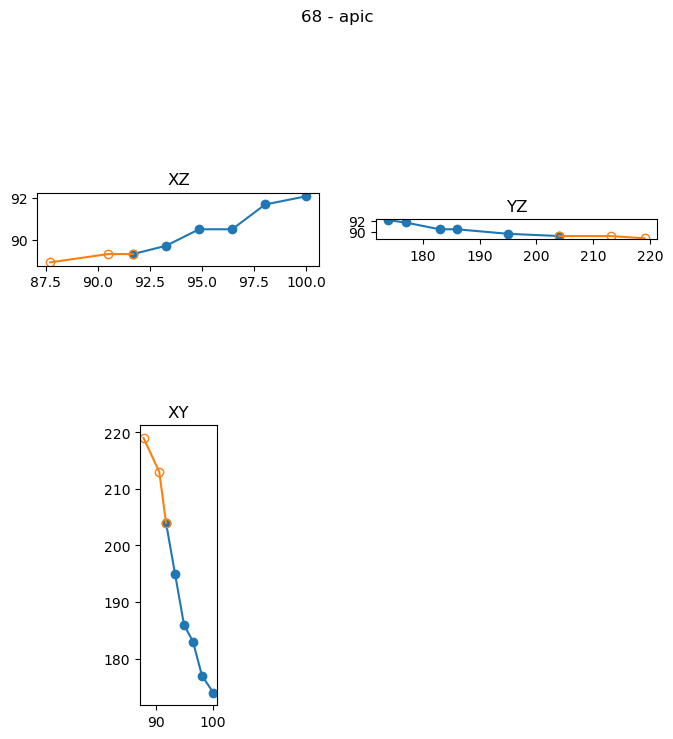

In [25]:
fix, ax = plt.subplots(2, 2, figsize=(8, 8))
swcm.swc_tree._sections[71].plot_pts3d(ax=ax, plot_radii=False)

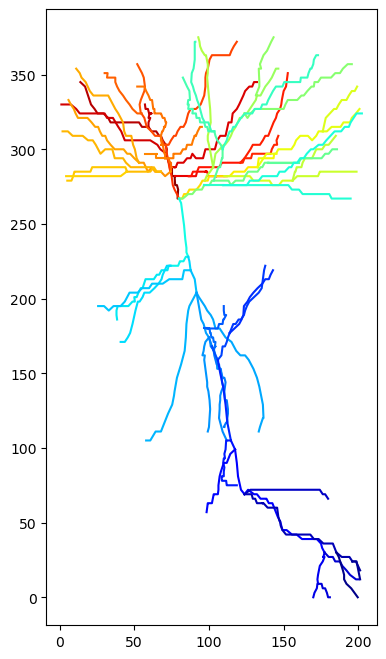

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
swcm.swc_tree.plot_sections(ax, 
                            show_points=False, 
                            show_lines=True, 
                            annotate=False)

# Section Tree

We now have our sections, but they are not properly connected

In [30]:
swcm.build_sec_tree()

Building SEC tree...
Connecting tree.
SEC tree validation passed successfully.
    is connected: 1
    is sorted:    1


In [ ]:
swcm.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     1 |   │ ├─•2
     2 |   │ │ ├─•3
     3 |   │ │ │ ├─•4
     4 |   │ │ │ │ ├─•5
     4 |   │ │ │ │ └─•6
     3 |   │ │ │ └─•7
     2 |   │ │ └─•8
     1 |   │ └─•9
     9 |   │   ├─•10
     9 |   │   └─•11
    11 |   │     ├─•12
    11 |   │     └─•13
     0 |   ├─•14
    14 |   │ ├─•15
    15 |   │ │ ├─•16
    15 |   │ │ └─•17
    17 |   │ │   ├─•18
    17 |   │ │   └─•19
    14 |   │ ├─•20
    20 |   │ │ ├─•21
    20 |   │ │ ├─•22
    20 |   │ │ └─•23
    14 |   │ └─•24
    24 |   │   ├─•25
    25 |   │   │ ├─•26
    25 |   │   │ └─•27
    24 |   │   ├─•28
    24 |   │   └─•29
    29 |   │     ├─•30
    29 |   │     └─•31
     0 |   ├─•32
    32 |   │ ├─•33
    33 |   │ │ ├─•34
    34 |   │ │ │ ├─•35
    34 |   │ │ │ └─•36
    36 |   │ │ │   ├─•37
    36 |   │ │ │   └─•38
    33 |   │ │ └─•39
    39 |   │ │   ├─•40
    39 |   │ │   └─•41
    32 |   │ └─•42
    42 |   │   ├─•43
    42 |   │   └─•44
    44 |   │     ├─•45

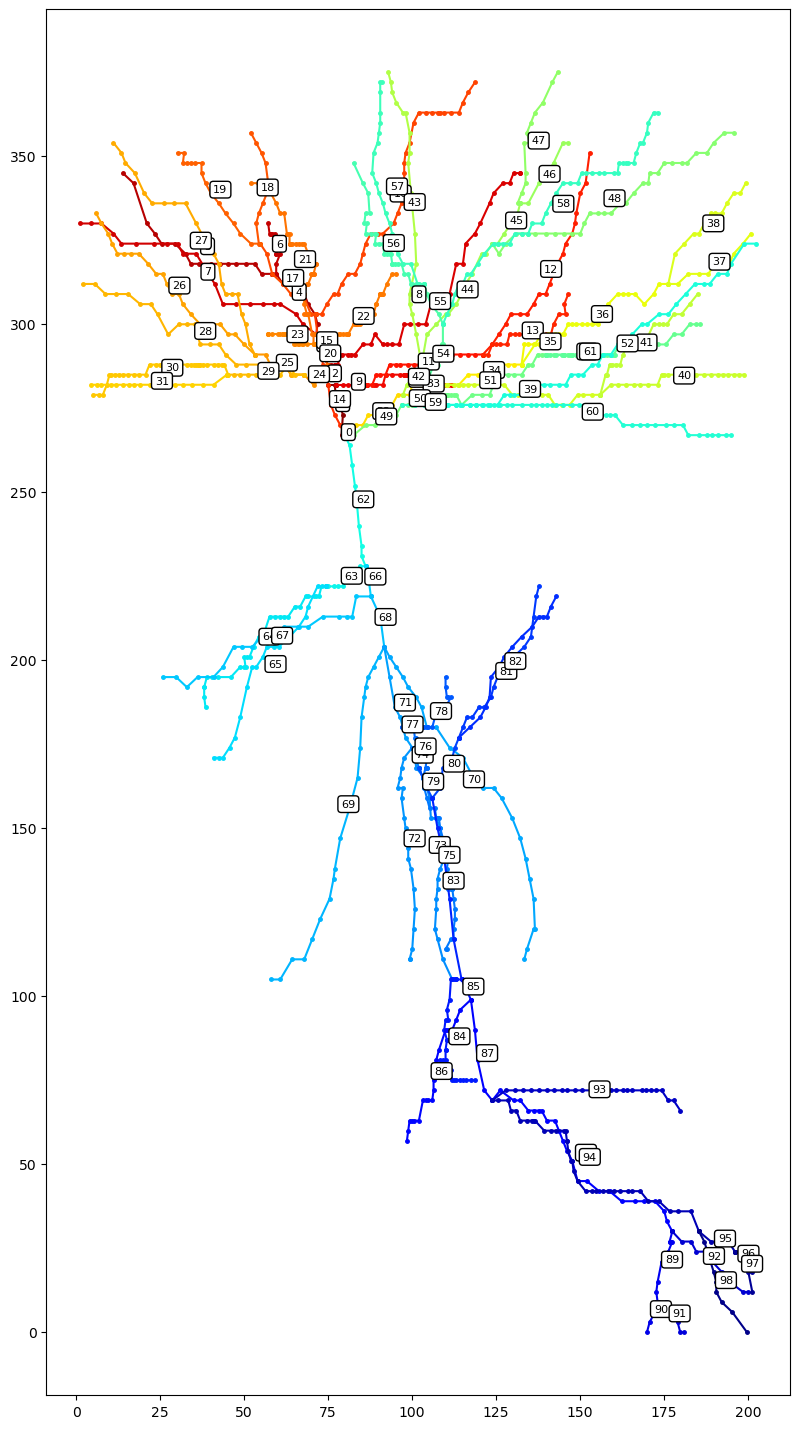

In [32]:
fig, ax = plt.subplots(figsize=(18, 18))
swcm.sec_tree.plot_sections(ax=ax, show_points=True, show_lines=True, annotate=True)